<a href="https://colab.research.google.com/github/JAC-02/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import essential libaries
import tweepy # open source Python package that gives you a very convenient way to access the Twitter API with Python
from textblob import TextBlob #a Python library for processing textual data.
from wordcloud import WordCloud#a Python library that will present a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [2]:
consumerkey = "UAVN2nt3bcfvhliuikyyjszxdfghbj"
consumersecret = "zsxdfcgvhbjnjhgfdzsxfcgvhbjvgcgx"
accesstoken ="wertyuiasdfghjbvcxzxcvbnbvcxcvbn"
accesstokensecret = "fgbgcxcvhcfgvhbjnjnhgvxdcfgvhbh"

In [3]:
#creating the authentiction object
authenticate = tweepy.OAuthHandler(consumerkey, consumersecret)

#Set the access token and access secret token

authenticate.set_access_token(accesstoken, accesstokensecret)

#Create API while passing in the auth information

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [4]:
#Extracting 400 tweet from user a well know controversial Big brother ex-housemate fan(swedishlove)
posts_extraction = api.user_timeline(screen_name = "SwedishLovee", count = 200, lan = "en", tweet_mode = "extended")

#print out the last 10 tweet from SwedishLovee account
print("Show 10 recent tweets from Swedish: /n")

n = 1
for posts in posts_extraction[0:10]:
    print(str(n) + ')' + posts.full_text + '/n')
    n = n+1


Show 10 recent tweets from Swedish: /n
1)@Julyannsark Ehn?? You didn’t watch the fashion tasks in the house?/n
2)@Julyannsark Yes🗣/n
3)And Hermes https://t.co/Cyc4vuizSd/n
4)RT @MontshengMadon1: My focus : Beauty Estanyi Tukura 

DOLLAR QUEEN
10 DAYS TO STRIKING25
#BeautyTukura
#BeeNavy https://t.co/g6zTFiszs1/n
5)Unathi?😂😂😂/n
6)RT @Iam_Unathi: See babe now 🥹🥹/n
7)See babe naw🥵 https://t.co/wSWe0gKiRM/n
8)Wow https://t.co/7qwKMbE2MN/n
9)@Nezr1 @Moyojoy1 Ahhhh/n
10)@Nezr1 Where did you see her outfit let me check/n


In [5]:
#Now, let me proceed to create a dataframe called Tweets_by_Swedish. This dataframe will store all the tweet from Swedish 
data = pd.DataFrame([posts.full_text for posts in posts_extraction], columns = ["Tweets_by_Swedish"])

#Automatically show the first five columns of the data
data.head()

,Tweets_by_Swedish
0,@Julyannsark Ehn?? You didn’t watch the fashio...
1,@Julyannsark Yes🗣
2,And Hermes https://t.co/Cyc4vuizSd
3,RT @MontshengMadon1: My focus : Beauty Estanyi...
4,Unathi?😂😂😂


In [6]:
#Create a functionn to tidy uu our dataset i.e remove unnecessary information
def tidyText(text):
    text= re.sub(r'@[A-Za-z0-9]+','', text) #To remove the mentions
    
    text = re.sub(r'#', '', text) #To remove the hashtags
    
    text = re.sub(r'RT[\s]+','', text) #To remove mention
    
    text = re.sub(r'https?:\/\/\S+', '', text) #To remove hyperlinks
    
    return text

In [7]:
#Apply the tidy text to the dataframe
data['Tweets_by_Swedish'] = data['Tweets_by_Swedish'].apply(tidyText)

#Visualizing the first five columns
data.head()

,Tweets_by_Swedish
0,Ehn?? You didn’t watch the fashion tasks in t...
1,Yes🗣
2,And Hermes
3,: My focus : Beauty Estanyi Tukura \n\nDOLLAR ...
4,Unathi?😂😂😂


In [8]:
#Create a function to get subjectivity and polarity
def Getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def Getpolarity(text):
    return TextBlob(text).sentiment.polarity


#Create two columns that will contain this
data['Subjectivity'] = data['Tweets_by_Swedish'].apply(Getsubjectivity)
data['Polarity'] = data['Tweets_by_Swedish'].apply(Getpolarity)

#Show the first five dataframe with columns
data

,Tweets_by_Swedish,Subjectivity,Polarity
0,Ehn?? You didn’t watch the fashion tasks in t...,0.0,0.0
1,Yes🗣,0.0,0.0
2,And Hermes,0.0,0.0
3,: My focus : Beauty Estanyi Tukura \n\nDOLLAR ...,0.0,0.0
4,Unathi?😂😂😂,0.0,0.0
...,...,...,...
195,: 7. BEAUTY,0.0,0.0
196,I’m actually screaming 🤣🤣🤣🤣🤣🤣,0.1,0.0
197,,0.0,0.0
198,Lmfao who will cry?,0.0,0.0


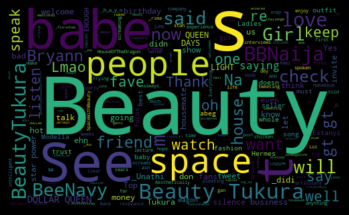

In [9]:
#Plotting the word cloud.

#Word cloud is the visualization technique that is used to illustrate specific and common words of the user

allTweets = ''.join([tweets for tweets in data['Tweets_by_Swedish']])

CloudWords = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(allTweets)

#plotting the graph
plt.imshow(CloudWords, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [10]:
#create a function to compute the negative, neutral and positive analysis

def analysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(analysis)

data

,Tweets_by_Swedish,Subjectivity,Polarity,Analysis
0,Ehn?? You didn’t watch the fashion tasks in t...,0.0,0.0,Neutral
1,Yes🗣,0.0,0.0,Neutral
2,And Hermes,0.0,0.0,Neutral
3,: My focus : Beauty Estanyi Tukura \n\nDOLLAR ...,0.0,0.0,Neutral
4,Unathi?😂😂😂,0.0,0.0,Neutral
...,...,...,...,...
195,: 7. BEAUTY,0.0,0.0,Neutral
196,I’m actually screaming 🤣🤣🤣🤣🤣🤣,0.1,0.0,Neutral
197,,0.0,0.0,Neutral
198,Lmfao who will cry?,0.0,0.0,Neutral


In [11]:
#Print out all the positive tweet

i = 1
polarData = data.sort_values(by=['Polarity'])

for j in range(0, polarData.shape[0]):
    if (polarData['Analysis'][j]=='Positive'):
        print(str(i)+')'+polarData['Tweets_by_Swedish'][j])
        print()
        i = i+1

1)Wow 

2)Proud of you 🤍 

3): Can I get 200 replies? 💕

DOLLAR QUEEN 
10 DAYS TO STRIKING 25
BeautyTukura

4): Beauty Tukura is one hot and stylish beauty queen 🥰🥰🔥 

👩🏽  

ZenMagazine BeautyTukura 

5)This whole scene from when he entered the hall had me crying like a baby . So emotional. A father’s love 🤍🤍 

6)Hermes must win best dressed abeg.

7) BEAUTY TUKURA IS ENOUGH 
BEAUTY SAID LOVE AND LIGHT 
BeautyTukura 
BeeNavy

8): BEAUTY TUKURA IS ENOUGH 
BEAUTY SAID LOVE AND LIGHT 
BeautyTukura 
BeeNavy 

9): Thank You Paddy Considine for being the absolute best King Viserys we could have ever asked for HouseOfTheDragon 

10)_Onyi_: Good morning to people that stan Nengi and Beauty Tukura... You get taste die

11) Lmao

12) Nonsense 😑😑. And you’re welcome

13) I wasn’t doing anything sha. I was going through the people I follow on snap videos. Was surprised to see her on timini’s snap. Na content I dey bring for you . You didn’t even say thank you 😒

14) Lmao

15)_D See! And it’s suits

In [12]:
#Print out all the negative tweet
i = 1
polarData = data.sort_values(by=['Polarity'], ascending = 'False')
for j in range(0, polarData.shape[0]):
    if (polarData['Analysis'][j]=='Negative'):
        print(str(i)+')'+polarData['Tweets_by_Swedish'][j])
        print()
        i = i+1

1): This girl here is slowly cementing herself in the fashion industry
When they realise it will be too late

2)Bad To Me is so clear 🔥🔥🔥

3)_odus: I knew her through forex trading...she hosted an event for a big forex company few weeks b4 going into the house, Beauty…

4): I didn't watch Beauty in the house at all and I'm curious to know her. I joined this space to start and she's doing well💕

5): Beauty is my kind of person tbt . The insights toh bad

6): There’s absolutely no reason not to like Beauty post show, unless you’re a winch.

7)Awww Beauty saying she’s obsessed with Bryann’s songs and we should go and listen to them ❤️

8)She’s so annoying 🤣 

9)_May Keep saying this until you believe it dearie . You guys will continue to be desperate for her to hear your faves name roll out from her tongue. 

10) Na wetin they desperately want 🤣

11)You people are angry that she ain’t granting any interviews so far . You want her to talk about your fave so baaaaaaad!!!! 

She will never e

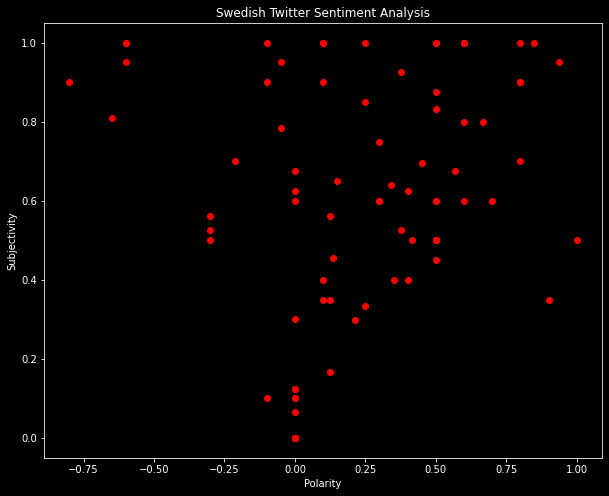

In [13]:
#let's visualize the subjectivity and polarity using scatter plot.

plt.figure(figsize=(10,8))
for i in range (0, data.shape[0]):
    plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color='Red')
    
plt.title('Swedish Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [14]:
# Observation

#From the scattered plot, you can deduce that there are more positive tweet than negative tweet and because of this, the values are alligned to the positive side more than the negative

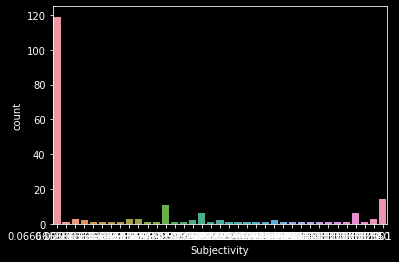

In [15]:
#Using a count plot for this visualization
sns.countplot(x='Subjectivity', data=data)

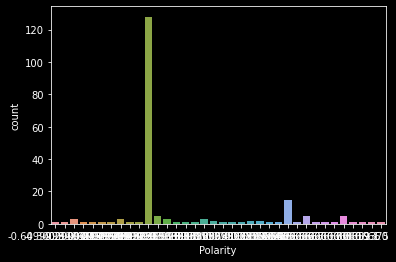

In [16]:
sns.countplot(x='Polarity', data=data)

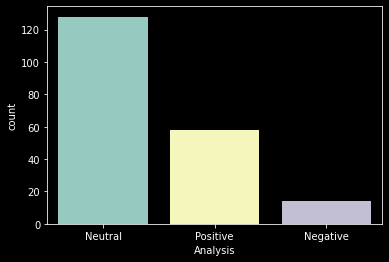

In [17]:
#Using Countplot to visualize the volume of Positive, Negative or Neutral Tweets
sns.countplot(x='Analysis', data=data)

In [18]:
#Calculating for the persentage of negative and positive tweets

#For Negative

PositiveTweets = data[data.Analysis == 'Positive']

PositiveTweets = PositiveTweets['Tweets_by_Swedish']
round( (PositiveTweets.shape[0]/data.shape[0]) *100, 1)



29.0

In [19]:
#For Negative Tweets

NegativeTweets = data[data.Analysis == 'Negative']

NegativeTweets = NegativeTweets['Tweets_by_Swedish']

round( (NegativeTweets.shape[0]/data.shape[0]) *100, 1)

7.0

In [20]:
#For Neutral Tweets

NeutralTweets = data[data.Analysis == 'Neutral']

NeutraTweets = NeutralTweets['Tweets_by_Swedish']

round( (NeutralTweets.shape[0]/data.shape[0]) *100, 1)

64.0